In [40]:
from ultralytics import YOLO
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [12]:
model = YOLO("yolov8m-seg.pt")

In [13]:
results = model.predict("cat_dog.jpg")


image 1/1 d:\YoloV8\Product_Segmentation_YoloV8\research\cat_dog.jpg: 384x640 1 cat, 2 dogs, 2063.7ms
Speed: 5.0ms preprocess, 2063.7ms inference, 19.0ms postprocess per image at shape (1, 3, 384, 640)


In [14]:
result = results[0]

In [15]:
masks = result.masks
len(masks)

3

In [57]:
mask1 = masks[0]

In [23]:
mask = mask1.data[0].numpy()
polygon = mask1.xy[0]

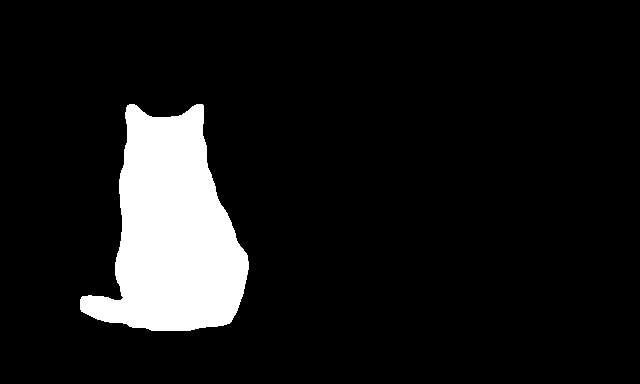

In [9]:
from PIL import Image
mask_img = Image.fromarray(mask,"I")
mask_img

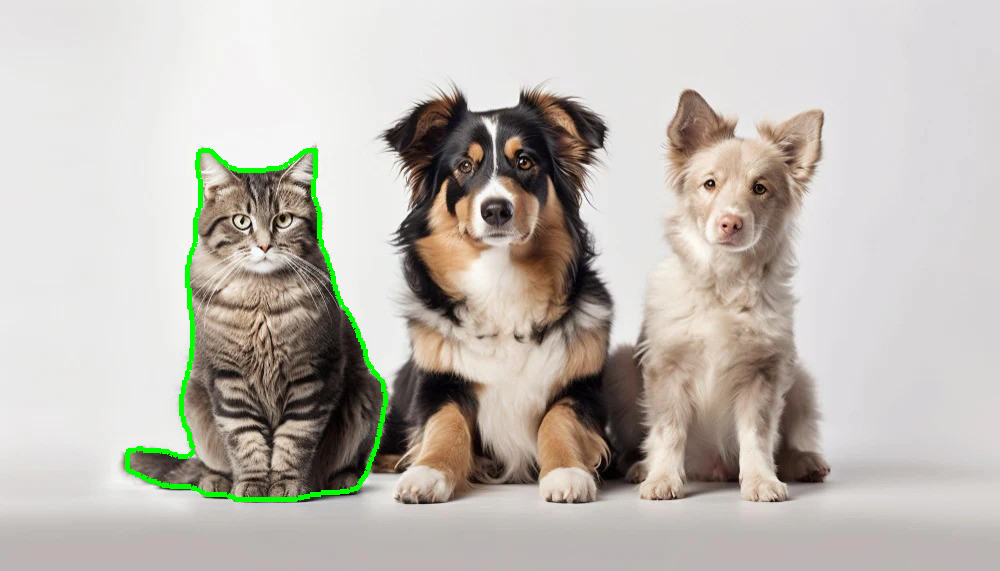

In [18]:
from PIL import ImageDraw

img = Image.open("cat_dog.jpg")
draw = ImageDraw.Draw(img)
draw.polygon(polygon,outline=(0,255,0), width=5)
img

In [28]:
counter_mask = np.zeros_like((mask > 0.5).astype(np.uint8) * 255)

In [24]:
counter,_ = cv2.findContours((mask > 0.5).astype(np.uint8) * 255,cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

In [25]:
counter

(array([[[129, 104]],
 
        [[128, 105]],
 
        [[127, 105]],
 
        [[127, 106]],
 
        [[126, 107]],
 
        [[126, 111]],
 
        [[125, 112]],
 
        [[125, 118]],
 
        [[126, 119]],
 
        [[126, 123]],
 
        [[127, 124]],
 
        [[127, 142]],
 
        [[126, 143]],
 
        [[126, 144]],
 
        [[125, 145]],
 
        [[125, 148]],
 
        [[124, 149]],
 
        [[124, 164]],
 
        [[123, 165]],
 
        [[123, 167]],
 
        [[122, 168]],
 
        [[122, 169]],
 
        [[121, 170]],
 
        [[121, 172]],
 
        [[120, 173]],
 
        [[120, 178]],
 
        [[119, 179]],
 
        [[119, 193]],
 
        [[120, 194]],
 
        [[120, 207]],
 
        [[121, 208]],
 
        [[121, 214]],
 
        [[122, 215]],
 
        [[122, 231]],
 
        [[121, 232]],
 
        [[121, 240]],
 
        [[120, 241]],
 
        [[120, 246]],
 
        [[119, 247]],
 
        [[119, 250]],
 
        [[118, 251]],
 
        [[118, 2

In [30]:
image = cv2.imread("cat_dog.jpg")

In [33]:
segmented_area = cv2.bitwise_and(image, image, counter_mask)

In [37]:
x, y, w, h = cv2.boundingRect(counter[0])
x, y, w, h

(80, 104, 169, 227)

In [38]:
cropped_segment = segmented_area[y:y+h, x:x+w]

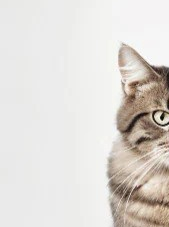

In [39]:
Image.fromarray(cv2.cvtColor(cropped_segment, cv2.COLOR_BGR2RGB))

In [41]:
def show_mask(mask, ax, random_color=False):
    if random_color:
        color = np.concatenate([np.random.random(3), np.array([0.6])], axis=0)
    else:
        color = np.array([30/255, 144/255, 255/255, 0.6])
    h, w = mask.shape[-2:]
    mask_image = mask.reshape(h, w, 1) * color.reshape(1, 1, -1)
    ax.imshow(mask_image)

def show_points(coords, labels, ax, marker_size=375):
    pos_points = coords[labels==1]
    neg_points = coords[labels==0]
    ax.scatter(pos_points[:, 0], pos_points[:, 1], color='green', marker='*', s=marker_size, edgecolor='white', linewidth=1.25)
    ax.scatter(neg_points[:, 0], neg_points[:, 1], color='red', marker='*', s=marker_size, edgecolor='white', linewidth=1.25)

def show_box(box, ax):
    x0, y0 = box[0], box[1]
    w, h = box[2] - box[0], box[3] - box[1]
    ax.add_patch(plt.Rectangle((x0, y0), w, h, edgecolor='green', facecolor=(0,0,0,0), lw=2))

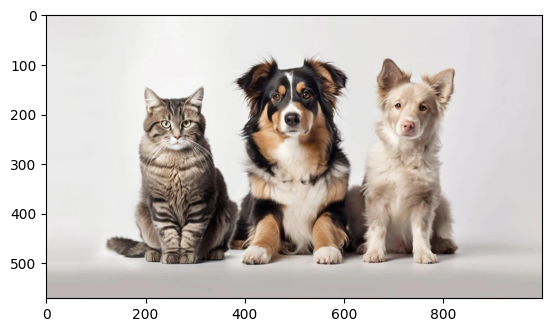

In [78]:
image = cv2.cvtColor(cv2.imread('cat_dog.jpg'), cv2.COLOR_BGR2RGB)
plt.imshow(image)

In [84]:
image.shape

(571, 1000, 3)

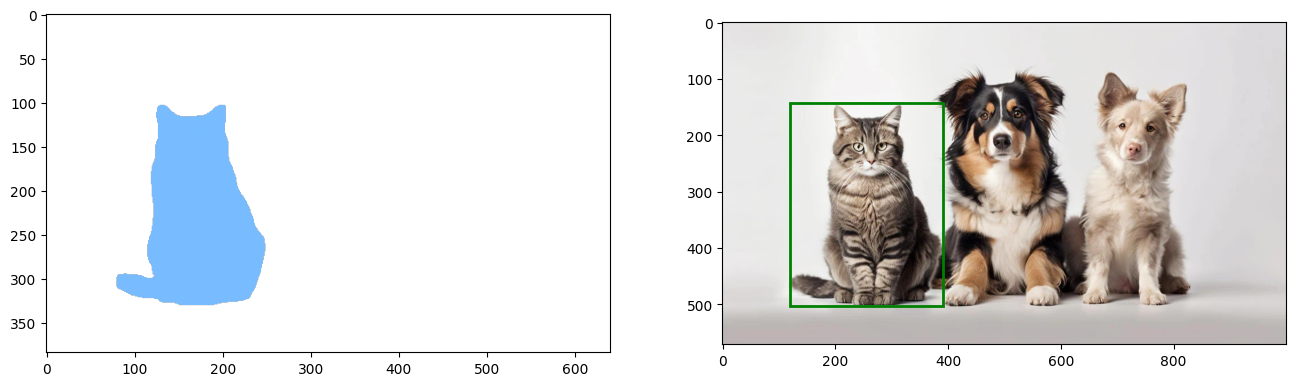

In [82]:
segmentation_mask = mask
binary_mask = np.where(segmentation_mask > 0.5, 1, 0)

white_background = np.ones_like(image) * 255
foreground_mask = cv2.bitwise_and(image, image, binary_mask)

fig, ax = plt.subplots(1, 2, figsize=(16, 8))

show_mask(segmentation_mask, ax[0])
show_box(result.boxes[0].xyxy.tolist()[0], ax[1])

ax[1].imshow(white_background)

ax[1].imshow(foreground_mask, alpha=1)

plt.show()

In [86]:
segmentation_mask_resized = cv2.resize(segmentation_mask, (image.shape[1], image.shape[0]), interpolation=cv2.INTER_NEAREST)

In [88]:
segmentation_mask_resized.shape

(571, 1000)

In [89]:
new_image = white_background * (1 - segmentation_mask_resized[..., np.newaxis]) + image * segmentation_mask_resized[..., np.newaxis]

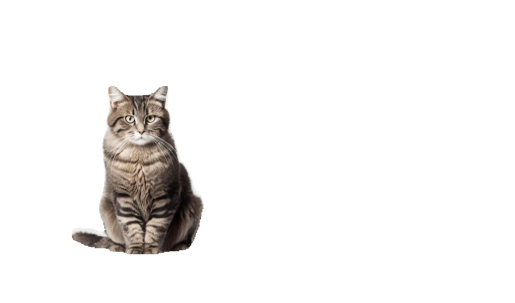

In [90]:
plt.imshow(new_image.astype(np.uint8))
plt.axis('off')
plt.show()

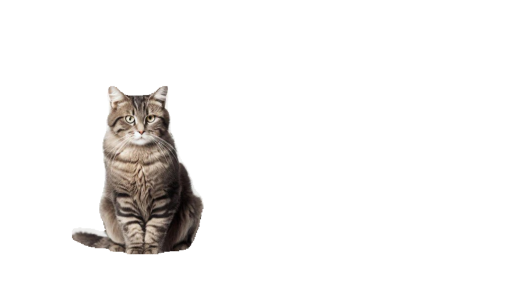

In [92]:
segmentation_mask_resized = cv2.resize(segmentation_mask, (image.shape[1], image.shape[0]), interpolation=cv2.INTER_NEAREST)

# Create the binary mask
binary_mask = np.where(segmentation_mask_resized > 0.5, 1, 0).astype(np.uint8)

# Expand dimensions of binary mask to match image channels
binary_mask_3d = np.repeat(binary_mask[:, :, np.newaxis], 3, axis=2)

# Create an alpha channel based on the binary mask
alpha_channel = binary_mask * 255

# Combine the image with the alpha channel
new_image = np.dstack((image, alpha_channel))

# Display the new image
plt.imshow(new_image.astype(np.uint8))
plt.axis('off')
plt.show()

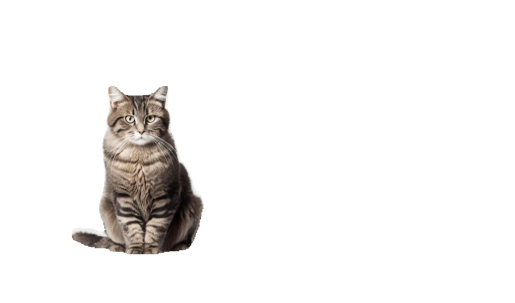

In [97]:
segmentation_mask = mask
segmentation_mask_resized = cv2.resize(segmentation_mask, (image.shape[1], image.shape[0]), interpolation=cv2.INTER_NEAREST)

binary_mask = np.where(segmentation_mask_resized > 0.5, 1, 0)

white_background = np.ones_like(image) * 255

new_image = white_background * (1 - binary_mask[..., np.newaxis]) + image * binary_mask[..., np.newaxis]

plt.imshow(new_image.astype(np.uint8))
plt.axis('off')
plt.show()

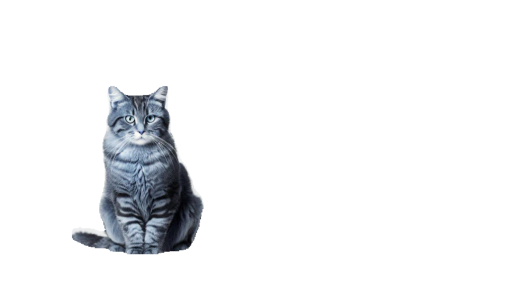

True

In [102]:
segmentation_mask_resized = cv2.resize(segmentation_mask, (image.shape[1], image.shape[0]), interpolation=cv2.INTER_NEAREST)

# Create the binary mask (ensure it's single channel)
binary_mask = (segmentation_mask_resized > 0.5).astype(np.uint8)

# Create an alpha channel based on the binary mask
alpha_channel = binary_mask * 255

# Create an RGBA image by adding the alpha channel to the original image
rgba_image = cv2.cvtColor(image, cv2.COLOR_RGB2RGBA)
rgba_image[:, :, 3] = alpha_channel

# Display the new image
plt.imshow(cv2.cvtColor(rgba_image, cv2.COLOR_BGRA2RGBA))
plt.axis('off')
plt.show()

# Save the new image if needed
cv2.imwrite('segmented_image.png', cv2.cvtColor(rgba_image, cv2.COLOR_RGBA2BGRA))

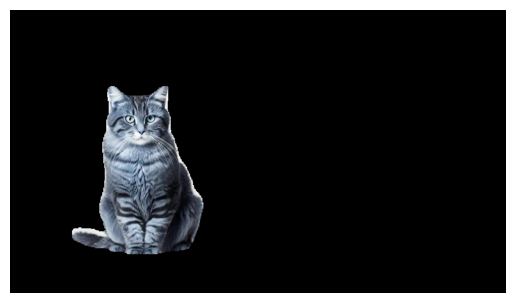

True

In [103]:
segmentation_mask_resized = cv2.resize(segmentation_mask, (image.shape[1], image.shape[0]), interpolation=cv2.INTER_NEAREST)

# Create the binary mask (ensure it's single channel)
binary_mask = (segmentation_mask_resized > 0.5).astype(np.uint8)

# Use the binary mask to extract the segmented region from the image
segmented_region = cv2.bitwise_and(image, image, mask=binary_mask)

# Display the segmented region
plt.imshow(cv2.cvtColor(segmented_region, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

# Save the segmented region if needed
cv2.imwrite('segmented_region.png', segmented_region)

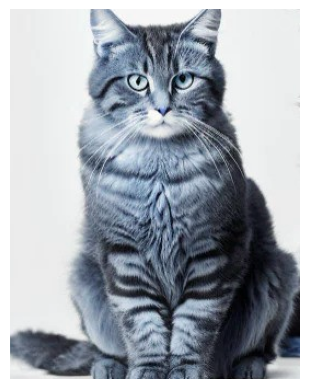

In [104]:
# Resize segmentation_mask to match the shape of the image if necessary
segmentation_mask_resized = cv2.resize(segmentation_mask, (image.shape[1], image.shape[0]), interpolation=cv2.INTER_NEAREST)

# Create the binary mask (ensure it's single channel)
binary_mask = (segmentation_mask_resized > 0.5).astype(np.uint8)

# Find contours in the binary mask
contours, _ = cv2.findContours(binary_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Find the bounding box of the largest contour (assumes one main object in mask)
if len(contours) > 0:
    # Find the largest contour by area
    largest_contour = max(contours, key=cv2.contourArea)
    
    # Get the bounding box coordinates
    x, y, w, h = cv2.boundingRect(largest_contour)
    
    # Crop the original image using the bounding box
    cropped_image = image[y:y+h, x:x+w]

    # Display the cropped image
    plt.imshow(cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()

    # Save the cropped image if needed
    cv2.imwrite('segmented_region_only.png', cropped_image)
else:
    print("No contours found in the segmentation mask.")

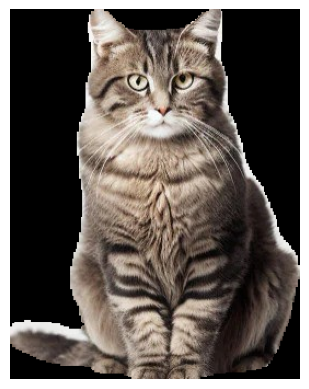

In [109]:
# Resize segmentation_mask to match the shape of the image if necessary
segmentation_mask_resized = cv2.resize(segmentation_mask, (image.shape[1], image.shape[0]), interpolation=cv2.INTER_NEAREST)

# Create the binary mask (ensure it's single channel)
binary_mask = (segmentation_mask_resized > 0.5).astype(np.uint8)

# Use the binary mask to extract the segmented region from the image
segmented_region = cv2.bitwise_and(image, image, mask=binary_mask)

# Find contours in the binary mask
contours, _ = cv2.findContours(binary_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Find the bounding box of the largest contour (assumes one main object in mask)
if len(contours) > 0:
    # Find the largest contour by area
    largest_contour = max(contours, key=cv2.contourArea)
    
    # Get the bounding box coordinates
    x, y, w, h = cv2.boundingRect(largest_contour)
    
    # Crop the segmented region using the bounding box
    cropped_segmented_region = segmented_region[y:y+h, x:x+w]

    # Create an alpha channel based on the binary mask
    alpha_channel = binary_mask[y:y+h, x:x+w] * 255

    # Combine the cropped segmented region with the alpha channel
    cropped_segmented_region_with_alpha = np.dstack((cropped_segmented_region, alpha_channel))

    # Display the cropped segmented region with alpha channel
    plt.imshow(cv2.cvtColor(cropped_segmented_region_with_alpha, cv2.COLOR_BGRA2BGR))
    plt.axis('off')
    plt.show()

    # Save the cropped segmented region if needed
    cv2.imwrite('segmented_region_only.png',  cv2.cvtColor(cropped_segmented_region_with_alpha, cv2.COLOR_RGBA2BGRA))
else:
    print("No contours found in the segmentation mask.")